Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('EastWestAirlines.csv')

In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
d1=data.iloc[:,1:]
d1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(d1)
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# kmeans

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=2)

In [10]:
model.fit(scaled_data)

KMeans(n_clusters=2)

In [11]:
#the wcss value for the model
model.inertia_

35409.516629861304

## hyperparam tuning

In [12]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    wcss.append(model.inertia_)

In [13]:
wcss

[43988.999999999985,
 35409.516629861304,
 30899.246824652193,
 27161.438675269543,
 23706.694307996433,
 21089.814809651274,
 19165.861458655658,
 17316.753604356494,
 15960.41687502215,
 14729.738063593482]

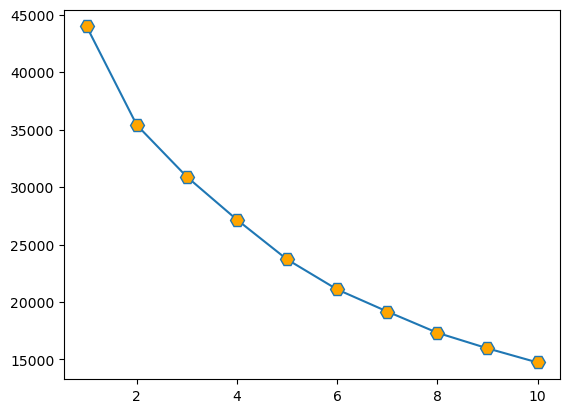

In [14]:
### Elbow Plot
plt.plot(range(1,11),wcss, marker='H', markersize=10, markerfacecolor='orange')
plt.show()

In [15]:
final_model = KMeans(n_clusters=3)

In [16]:
final_model.fit(scaled_data)

KMeans(n_clusters=3)

In [17]:
final_model.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [18]:
d1['Label'] = final_model.labels_

In [19]:
d1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [20]:
grp = d1.groupby('Label')

In [21]:
for x,y in grp:
    print(y)
    print('_'*70)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3993     3974           0          1          1          1          365   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1      

In [22]:
grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Label,,,,,,,,,,,
0,44370.062160,96.833333,1.235820,1.019037,1.000389,4831.835276,7.005439,200.697358,0.626263,3704.442502,0.203963
1,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976
2,117454.663759,157.509120,3.728787,1.002379,1.038065,40427.265662,18.982554,345.440127,1.022998,4886.176844,0.652657


# Hirarichal agg_clustering

In [23]:
d1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2


###  scale the data using minmaxscaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(d1)

## build the model

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')

In [28]:
model.fit(scaled_data)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [29]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
d1['Labels']=model.labels_

In [31]:
d1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label,Labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,2


In [32]:
grp=d1.groupby('Labels')

In [33]:
for x,y in grp:
    print(y)
    print('_'*70)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3991    39142           0          3          1          1        14981   
3992    11181           0          1          1          1          929   
3993     3974           0          1          1          1          365   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1      

In [34]:
grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
Labels,,,,,,,,,,,,
0,59918.558416,87.755644,1.703366,1.019010,1.008713,10274.461386,9.191287,231.601584,0.674455,3822.798812,0.002772,0.360396
1,79148.204122,201.978410,1.887144,1.009814,1.001963,14210.469087,12.790972,810.341511,2.411187,4426.020608,1.000000,0.898921
2,137110.613187,327.285714,4.421978,1.000000,1.054945,61843.421978,22.316484,943.364835,2.929670,5071.290110,1.000000,1.890110


In [35]:
from scipy.cluster import hierarchy

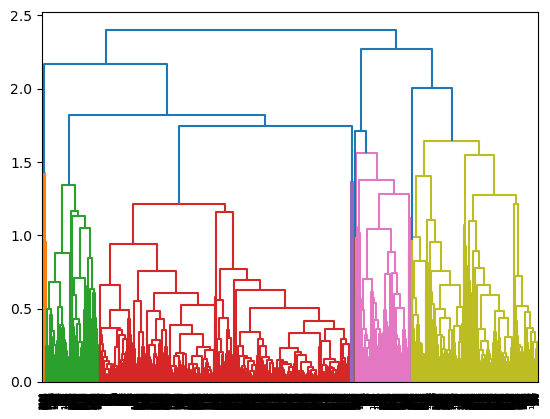

In [36]:
hr=hierarchy.linkage(scaled_data,method='complete')
dn=hierarchy.dendrogram(hr)

# DBSCAN

In [57]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [95]:
df=data.iloc[:,1:]
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
0,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [96]:
array=df.values
array

array([[28143,     0,     1, ...,  7000,     0,    -1],
       [19244,     0,     1, ...,  6968,     0,    -1],
       [41354,     0,     1, ...,  7034,     0,    -1],
       ...,
       [73597,     0,     3, ...,  1402,     1,    -1],
       [54899,     0,     1, ...,  1401,     0,    -1],
       [ 3016,     0,     1, ...,  1398,     0,    -1]], dtype=int64)

In [97]:
scaler=StandardScaler()
scaled_data=stscaler.fit_transform(array)
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  0.00000000e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01,  0.00000000e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01,  0.00000000e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  0.00000000e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  0.00000000e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  0.00000000e+00]])

In [98]:
from sklearn.cluster import DBSCAN

In [99]:
model = DBSCAN(min_samples=14, eps=2.5)

In [105]:
clusters=model.fit_predict(scaled_data)

In [106]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
set(clusters)

{-1, 0, 1}

In [108]:
df['cluster']=model.labels_
df.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label,cluster
3994,18476,0,1,1,1,8525,4,200,1,1403,1,-1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,-1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,-1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,-1,0
3998,3016,0,1,1,1,0,0,0,0,1398,0,-1,0


In [109]:
from sklearn import cluster
df[df['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label,cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1,-1
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1,-1
87,609477,0,3,1,1,21422,22,1200,8,6820,0,-1,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1,-1
3883,126167,0,5,1,1,190160,15,0,0,1612,1,-1,-1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1,-1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,-1,-1


In [110]:
from sklearn.metrics import silhouette_score
score=silhouette_score(scaled_data,model.labels_,metric='euclidean')
score

0.5412265880090159